# Running MULTIGRIS (convergence checks)

<font color=red>For best performance, it is advised to execute MULTIGRIS in the shell, as explained in the README. This notebook is just a way to illustrate a workflow. </font>

***
Motivations and goal:
- Checking some diagnostics and provide some solutions in case of pathological posterior distributions

The following context will be used:
- SFGX (star-forming galaxies with X-ray component; Ramambason et al. [2022](https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..35R/abstract)) based on Cloudy models (Ferland et al. [2017](https://ui.adsabs.harvard.edu/abs/2017RMxAA..53..385F/abstract))

The various notebooks use some specific terms described in the file [TERMS.org](https://gitlab.com/multigris/mgris/-/blob/master/TERMS.org?ref_type=heads). 
***

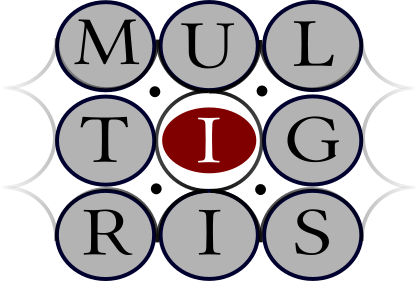

In [1]:
%load_ext autoreload
%autoreload 2
from wand.image import Image as WImage #this is to view PDFs
from IPython.display import Image
Image(filename='../Images/logo.png') 

## Table of contents:
* [Example run](#app)
* [Checking diagnostics](#app1)
* [Checking correlations](#app2)

## Import and settings
---

In [2]:
import os 

import sys
sys.path.append('../') 

#arviz to read the PyMC3 trace
import arviz as az

import numpy as np
import matplotlib.pyplot as plt

#imports to make input files
import importlib
import Library.lib_input
importlib.reload(Library.lib_input)
from Library.lib_input import *
from Library.lib_plots import plot_2DPDF

#import the main MULTIGRIS scripts
import mgris_search, mgris_process, mgris_post_process, mgris_compare, mgris_diagnose

#may need to run this if the script is interrupted
from Library.lib_main import closelogfiles
closelogfiles()

import pickle

#this is the input filename we'll use throughout, it will be automatically copied in the output directories each run
os.makedirs('./Runs/ISM_applications', exist_ok=True)
inputfile = './Runs/ISM_applications/input.txt' 

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Example run <a class="anchor" id="app"></a>
***

In this notebook, we first run a model for the NGC5253 galaxy.

We use the observations as is to show how the posterior can be problematic, using some diagnostic tools.

In [3]:
params = get_params()
params['context'].value = './Contexts/mgris_sfgx'
output_directory = './Runs/ISM_applications/NGC5253/'
params['output'].value = output_directory
params['USE configuration'].value = '1C2S'
params['BEGIN configuration'].value = 'distrib Z single linear'
params['select'].value = ['cut [0,1.25]', 'lum [7,7]'] 
params['BEGIN observations'].value = '''O388.3323m 1.725e+040 8.425e+037
N357.3238m nan nan
N2121.767m 1.771e+038 2.317e+037
Ne315.5509m 1.256e+040 7.439e+038
Ne212.8101m 2.318e+039 1.142e+039
S410.5076m 1.035e+040 4.031e+039
S318.7078m 4.995e+039 2.379e+039
S333.4704m 1.198e+040 7.618e+039
C2157.636m 8.636e+039 2.796e+037
Si234.8046m 6.305e+039 4.496e+039
O425.8832m 1.876e+038 4.615e+037
Ar26.98337m 3.023e+038 5.515e+037
Ar38.98898m 1.248e+039 1.206e+038
Fe217.9314m <6.549e+037 nan
Fe225.9811m 2.25e+038 4.672e+037
Ar321.8253m <6.357e+037 nan
H112.3684m 3.079e+038 2.049e+037
N2205.244m nan nan
O163.1679m 5.610e+039 9.708e+037
O1145.495m 3.944e+038 7.659e+036
H217.0300m 1.335e+038 3.83e+037
H29.66228m <2.629e+038 nan
Ne514.3228m <2.145e+037 nan
Ne524.2065m <6.549e+037 nan
LTIR500.500m 6.261e+042 1.137e+041
Fe322.9190m 2.619e+038 5.572e+037
H228.2130m <7.621e+037 nan
H212.2752m <4.002e+037 nan'''
params['BEGIN observations'].extras = {'scale': 'linear', 'scale_factor': 1}
params['use_scaling'].value = "'all'"
make_input(params, inputfile)

In [4]:
%cat $inputfile

##################################
#### INPUT FILE FOR MULTIGRIS ####
##################################

# Generated automatically
# Date: Tue 10 September 2024 - 08:41:49
    

#------------------------------------------------------------------
#VERSIONS
#------------------------------------------------------------------

# Python
#  - version      : 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
#  - bin          : /local/home/vleboute/miniconda3/bin/python
#  - prefix       : /local/home/vleboute/miniconda3

# PyMC
#  - version      : 5.16.2

# mgris
#  - git commit   : 1319007
#  - (date)       : 2024-09-06 20:53:43 +0200
#  - (submodules) : 'Contexts/mgris_bond': 474a7c3, 'Contexts/mgris_loc': 78805da, 'Contexts/mgris_sfgx': dcd6f15

#------------------------------------------------------------------





#---------------------------------------------------------------------
#OUTPUT
#---------------------------------------------------------------------

# OUTPUT PATH (Mandator

In [5]:
closelogfiles() #in case run was interrupted
mgris_search.main(args=mgris_search.args(inputfile=inputfile, nsamples_per_job=100, verbose=True))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍           ┑
     ┝ INFERENCE ┥
     ┕           ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INPUT PARAMETERS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


- context                                            : ./Contexts/mgris_sfgx
-- Using pre-defined configuration 1C2S
- linterp_params                                     : [] (default)
- plaw_params                                        : [] (default)
- smoothplaw_params                                  : [] (default)
- brokenplaw_params                                  : [] (default)
- normal_params                                      : [] (default)
- doublenormal_params                                : [] (default)
- directory_models                                   : Contexts/mgris_sfgx/
- o

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details

✨
✨✨
✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨
✨✨
✨
✨✨
✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨ INFERENCE END
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨
✨✨
✨
Trace posterior :
-----------------
<xarray.Dataset> Size: 121kB
Dimensions:                  (chain: 4, draw: 100, w_dim_0: 2)
Coordinates:
  * chain                    (chain) int64 32B 0 1 2 3
  * draw                     (draw) int64 800B 0 1 2 3 4 5 ... 94 95 96 97 98 99
  * w_dim_0                  (w_dim_0) int64 16B 0 1
Data variables: (12/46)
    idx_Lx_0                 (chain, draw) floa

In [6]:
closelogfiles() #in case run was interrupted
mgris_process.main(args=mgris_process.args(inputfile=inputfile))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍            ┑
     ┝ PROCESSING ┥
     ┕            ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INFERENCE DATA ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓









    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 10/09/2024 08:48:07
    ┕========================================┙
   







    ┍========================================┑
    ┝============= Run summary ==============┥
    ┝========================================┙
    ┝ - input file         : ./Runs/ISM_applications/input.txt
    ┝ - output directory   : ./Runs/ISM_applications/NGC5253/
    ┕========================================┙
    
List of tracers whose detection level deviat

In [7]:
%cat $output_directory/results.txt

- /!\ Some chains seem to be stuck in burn-in phase or in local peak (significantly lower likelihood over chain length): [0, 2, 3]

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
idx_Lx_0      1.194  0.130   1.043    1.457      0.056    0.042       7.0      67.0   1.63
idx_Lx_1      1.194  0.130   1.043    1.457      0.056    0.042       7.0      67.0   1.63
idx_Tx_0      0.934  0.297   0.586    1.446      0.136    0.104       6.0      38.0   2.10
idx_Tx_1      0.934  0.297   0.586    1.446      0.136    0.104       6.0      38.0   2.10
idx_Z_0       3.403  0.042   3.341    3.470      0.019    0.014       5.0      27.0   2.64
idx_Z_1       3.403  0.042   3.341    3.470      0.019    0.014       5.0      27.0   2.64
idx_Z_dust_0  0.974  0.287   0.504    1.294      0.133    0.101       5.0      31.0   2.89
idx_Z_dust_1  0.974  0.287   0.504    1.294      0.133    0.101       5.0      31.0   2.89
idx_age_0     3.931  1.200   1.799    5.162      

## Checking diagnostics <a class="anchor" id="app1"></a>
***

The "diagnose" script performs several calculations to identify potential issues with abnormally low uncertainites.

In [8]:
closelogfiles() #in case run was interrupted
mgris_diagnose.main(args=mgris_diagnose.args(inputfile=inputfile))


    System summary
    - Date/time         : 10/09/2024 08:48:33
    

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ VERIFICATIONS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓



- ESS informs if the chains are large enough (effective number of uncorrelated draws)
  - bulk: sampling efficiency in the bulk of the distribution (related to efficiency of mean and median estimates)
  - tail: minimum for 5% and 95% quantiles.
- rhat informs if the chains mix well
- MCSE estimates the error introduced by sampling and thus the level of precision of our estimates
    
    

 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
 ▒ CHECKING PARAMETERS ▒
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
age_0     0.677  0.125   0.442    0.798      0.058    0.044       6.0      41.0   2.55
n_0       1.714  0.911   0.352    3.034      0.424    0.321       5.0      22.0   2.98
n_1       1.023  0.288   0.683    1.481      0.130    0.099       6.0      48.0   2.12
u_0      -2.384  0.944  -3.622   -1.111      0.441   

The script shows that two tracers, O388.3323m (and C2157.636m, though to a lesser extent), has significantly *lower rhat and larger ESS values* compared to the others. This suggests that the solution is controlled by these tracers and this is due to the relative small uncertainties. As a result, the other lines are not useful in narrowing down the solution and the individual chains may be stuck in different solutions where O388.3323m and C2157.636m are well reproduced. 

We can see in the corresponding draws that these two lines are indeed well constrained with chains in agreement but the other tracers show many peaks at various values.

This is usually a sign that the uncertainties on the observables are smaller than what the grid can accommodate. In other words, either the grid is fine and the observables have underestimated uncertainties (uncertainty due to line fit vs. other systematic uncertainties from the instrument side, calibration errors...) or the model "architecture" (i.e., configuration+potential priors) is not adapted (to few free parameters, bad priors etc...). 

If you have issues with WImage on Linux, try adding ```<policy domain="coder" rights="read | write" pattern="PDF" />``` in /etc/ImageMagick-?/policy.xml

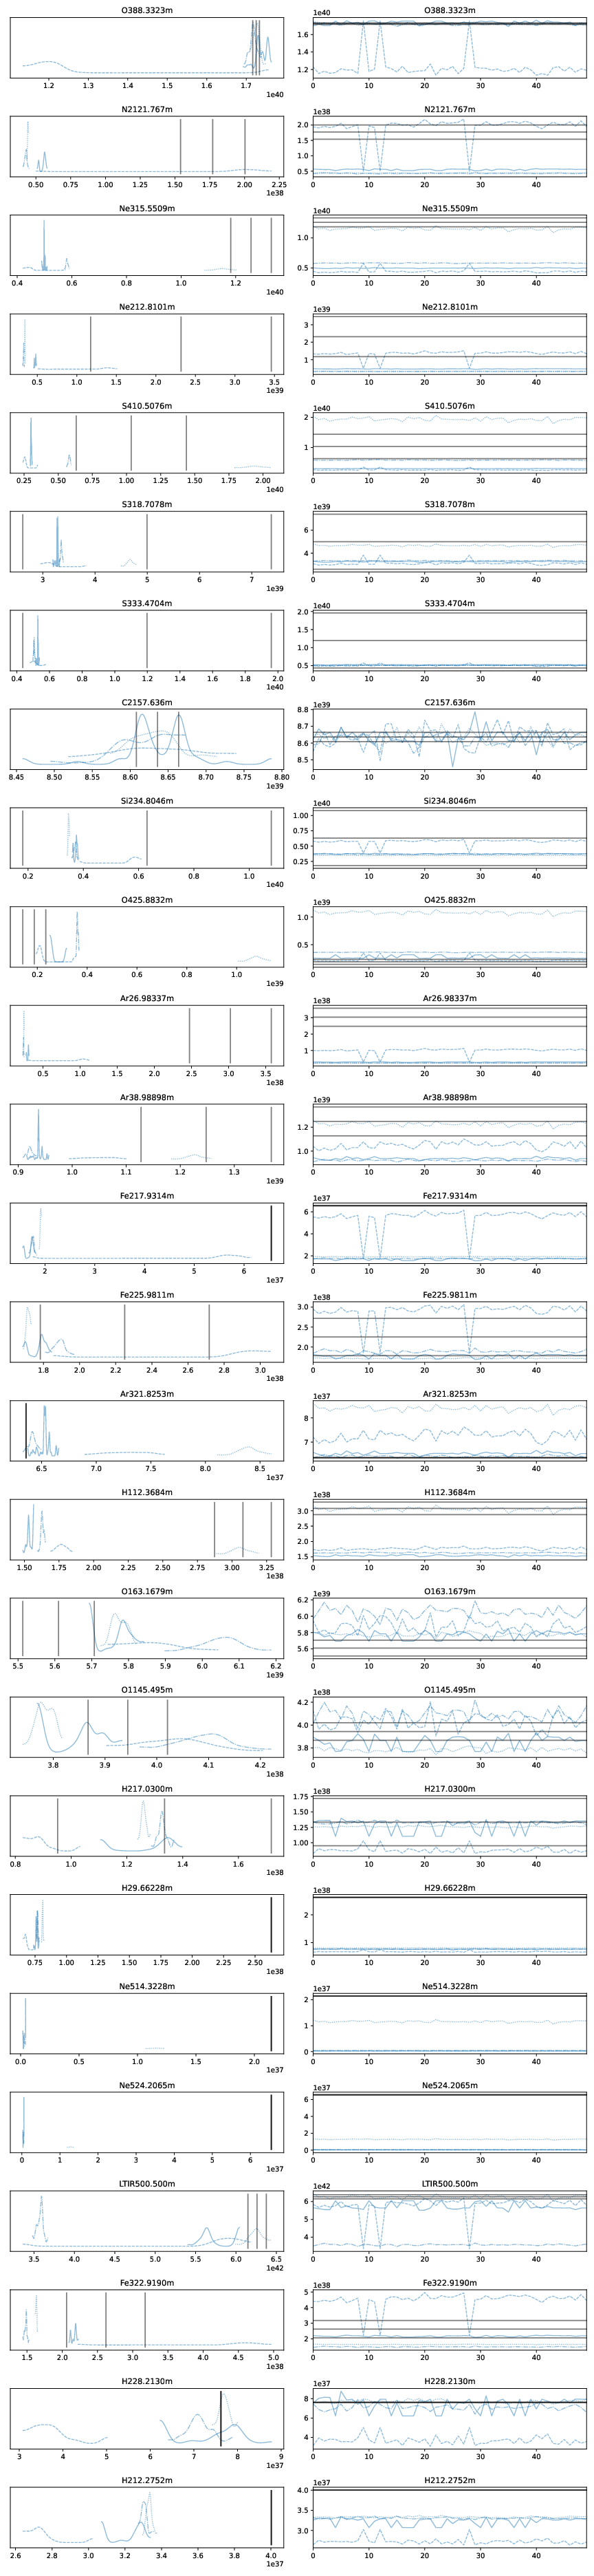

In [9]:
WImage(filename=output_directory+'Plots/Trace_observables.pdf') 

One problem is that there are many solutions that can agree with these two tracers if the other tracers cannot constrain further. Hence this directly translates into a parameter posterior with several solutions all over the place:

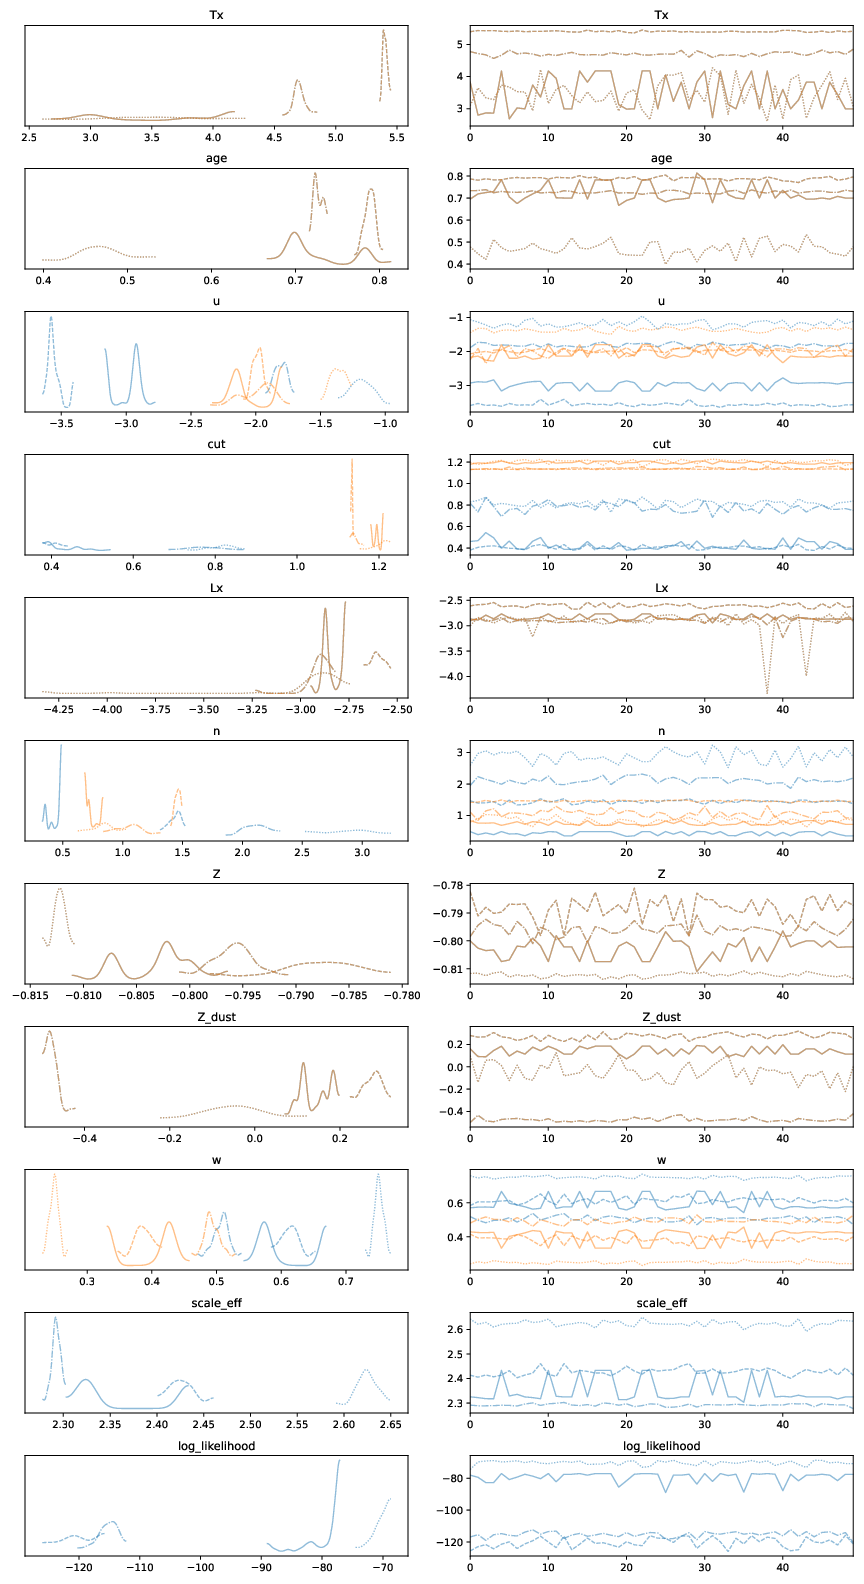

In [10]:
WImage(filename=output_directory+'Plots/Trace_params.pdf') 

In the plot above one can notice several things:
- there are several solutions that reproduce the two dominant tracers, each chain got stuck to one particular solution. If we added a chain, we would most likely find another solution yet. 
- the peaks correspond to particular solutions, and the narrow width reflects the relatively small uncertainties.
- chains show relatively narrow parameter ranges, which is one reason why they got stuck. The importance sampling criterion will reject samples away from the -- very narrow -- peak. 

Considering these items, the likelihood in each chain may be stuck to a relatively high value that doesn't necessarilly represent a good solution for *all* tracers.

To calculate the rhat and ESS values manually, you can use the following:

In [11]:
t = az.from_netcdf(output_directory+'/trace_process.netCDF').posterior

Rhat:

In [12]:
float(az.rhat(t)['O388.3323m'].values)

1.7213840841378356

ESS:

In [13]:
float(az.ess(t, method='tail')['O388.3323m'].values)

48.27252706111916

This is a very common problem and there are various ways to address this. For instance, one may choose to add a systematic uncertainty to the observables that account for potential unknown uncertainties in the data but also reflect the fact that the model is not perfect either (uncertainties due to atomic data, abundances, and also architecture). 

This can be done by adding the line:
delta_add 0.1
to the observation block. This will add a minimum 10% uncertainty to all lines that have a relative uncertainty less than 10% (the others are untouched). 

The same script also checking whether some tracers have too low uncertainties compared to the grid.
 Value quoted is the ratio of the HDI range over the observed uncertainty (<1 is just low detection level, significantly >1 means the detection might be overestimated)

  - O388.3323m: 35.09594050841989 /!\ 
  - LTIR500.500m: 12.536568903618914 /!\ 
  - O425.8832m: 9.795588402374324 /!\ 
  - Ne315.5509m: 5.0204806768834445 /!\ 
  - H112.3684m: 3.9195186600210694 /!\ 
  - N2121.767m: 3.5890045646714492 /!\ 
  - C2157.636m: 3.139757387736397 /!\ 
  - Fe322.9190m: 2.9315077275875354 /!\ 

The tracers above seem to have too small uncertainties for the typical variations in the grid. 

To calculate these values manually:

In [14]:
hdi = az.hdi(t)['O388.3323m'].values
print(hdi)

[1.70909104e+40 1.76012874e+40]


In [15]:
with open(output_directory+'/input.pkl', 'rb') as f:
    inp = pickle.load(f)

In [16]:
inp['observations'].obs

{'O388.3323m': <Library.lib_class.Observation at 0x7f6b64e575b0>,
 'N2121.767m': <Library.lib_class.Observation at 0x7f6b64e57670>,
 'Ne315.5509m': <Library.lib_class.Observation at 0x7f6b64e57ee0>,
 'Ne212.8101m': <Library.lib_class.Observation at 0x7f6b64e577c0>,
 'S410.5076m': <Library.lib_class.Observation at 0x7f6b64e57c70>,
 'S318.7078m': <Library.lib_class.Observation at 0x7f6b64e57f40>,
 'S333.4704m': <Library.lib_class.Observation at 0x7f6b64e57340>,
 'C2157.636m': <Library.lib_class.Observation at 0x7f6b64e572e0>,
 'Si234.8046m': <Library.lib_class.Observation at 0x7f6b7011aca0>,
 'O425.8832m': <Library.lib_class.Observation at 0x7f6b7011a550>,
 'Ar26.98337m': <Library.lib_class.Observation at 0x7f6b7011af10>,
 'Ar38.98898m': <Library.lib_class.Observation at 0x7f6b7011a340>,
 'Fe217.9314m': <Library.lib_class.Observation at 0x7f6b7011a3d0>,
 'Fe225.9811m': <Library.lib_class.Observation at 0x7f6b70113580>,
 'Ar321.8253m': <Library.lib_class.Observation at 0x7f6b70113940>,
 '

In [17]:
print(10**inp['observations'].obs['O388.3323m'].value)
print(inp['observations'].obs['O388.3323m'].delta)

1.725000000000001e+40
[8.425e+37, 8.425e+37]


In [18]:
(hdi[1]-hdi[0]) / np.sum(inp['observations'].obs['O388.3323m'].delta)

3.02894335917553

## Checking correlations <a class="anchor" id="app2"></a>
***

Here we use another run with a less problematic posterior

In [19]:
output_directory = './Runs/ISM_applications/Zcalc_1C1S_Zinterp/'

In [20]:
inputfile = output_directory + '/input.txt' 

In [21]:
mgris_diagnose.main(args=mgris_diagnose.args(inputfile=inputfile))


    System summary
    - Date/time         : 06/11/2023 20:23:18
    
Using pre-defined configuration 1C1S

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ VERIFICATIONS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓



- ESS informs if the chains are large enough (effective number of uncorrelated draws)
  - bulk: sampling efficiency in the bulk of the distribution (related to efficiency of mean and median estimates)
  - tail: minimum for 5% and 95% quantiles.
- rhat informs if the chains mix well
- MCSE estimates the error introduced by sampling and thus the level of precision of our estimates
    
    

 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
 ▒ CHECKING PARAMETERS ▒
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
lum_0     7.275  0.145   7.065    7.495      0.002    0.002    3698.0    3816.0   1.01
age_0     0.715  0.067   0.651    0.836      0.001    0.001    3900.0    2673.0   1.00
n_0       1.497  0.602   0.546    2.499      0.009    0.007    4033.0    3612.0   1.00
u_0      -2.997 

The following plot shows the correlation between tracers *around the solution*. The correlation coefficient for each tracer is calculated versus each parameter and these coefficients are compared between tracers. A coefficient of 0 between two tracers means that the two tracers trace entirely different parameters while 1 means they trace the same parameters.

In [22]:
WImage(filename=output_directory+'Plots/correlation_map_tracers.pdf') 

One can see several dark "blocks" of tracers with the same shade, hinting at redundant tracers that may constrain the same parameters.

One can do the same with parameters:

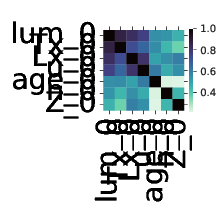

In [23]:
WImage(filename=output_directory+'Plots/correlation_map_parameters.pdf') 

The following plots show which tracers correlate best with each parameter. 

<font color=red>Even though the model solution was inferred using the observed values and their uncertainties, the tracers below are the ones predicted by the model (i.e., from the MCMC trace), so this shows which tracers are potentially useful in constraining the parameters around the model solution.</font>

We can see for instance that many tracers correlate with the metallicity (with the H line anti-correlating and metal lines correlating), and since many of these tracers are well detected, this means in turn that the metallicity is particularly well constrained.

In [24]:
WImage(filename=output_directory+'Plots/correlation_parameters.pdf') 

Inversely, we can check which parameters each tracer constrain:

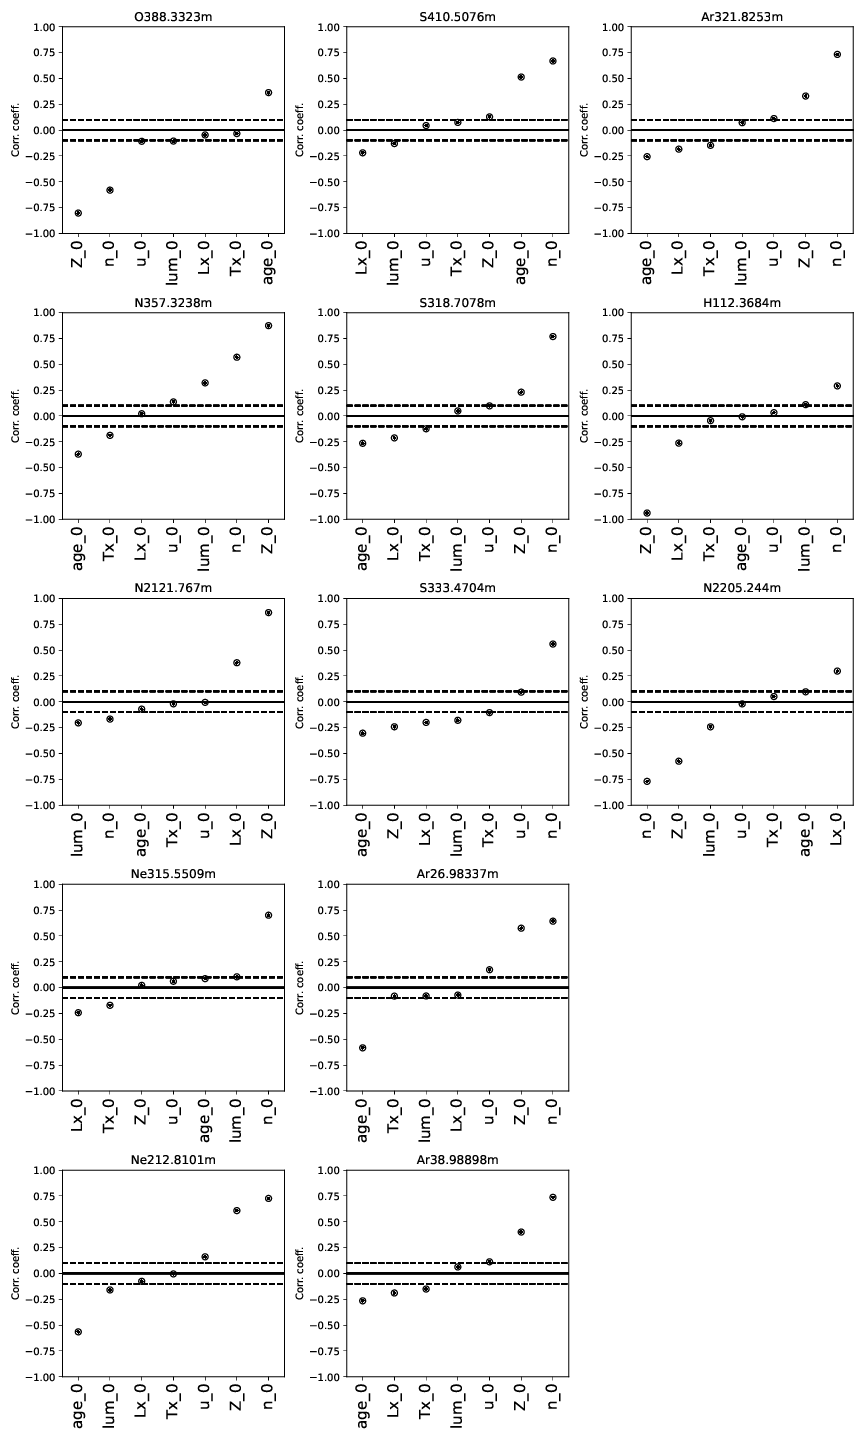

In [25]:
WImage(filename=output_directory+'Plots/correlation_tracers.pdf') 

## Make some plots <a class="anchor" id="app3"></a>
***

In [26]:
output_directory = './Runs/ISM_applications/NGC5253/'

In [27]:
t = az.from_netcdf(output_directory + "trace_process.netCDF")

In [28]:
t.posterior.keys()

KeysView(<xarray.Dataset>
Dimensions:              (chain: 4, draw: 1000, scale_dim_0: 1, w_dim_0: 2)
Coordinates:
  * chain                (chain) int64 0 1 2 3
  * draw                 (draw) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * scale_dim_0          (scale_dim_0) int64 0
  * w_dim_0              (w_dim_0) int64 0 1
Data variables: (12/144)
    scale                (chain, draw, scale_dim_0) float32 ...
    idx_age_0            (chain, draw) float32 ...
    idx_n_0              (chain, draw) float32 ...
    idx_u_0              (chain, draw) float32 ...
    idx_Z_0              (chain, draw) float32 ...
    idx_Lx_0             (chain, draw) float32 ...
    ...                   ...
    f_g0_H228.2130m      (chain, draw) float32 ...
    f_g0_s_H228.2130m    (chain, draw, w_dim_0) float32 ...
    f_s_H212.2752m       (chain, draw, w_dim_0) float32 ...
    f_g0_H212.2752m      (chain, draw) float32 ...
    f_g0_s_H212.2752m    (chain, draw, w_dim_0) float32 ...
    scale_

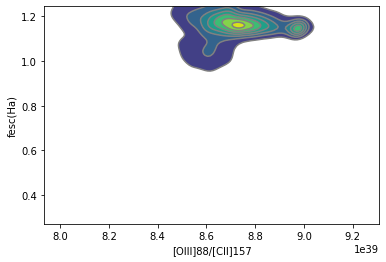

In [29]:
plot_2DPDF(
    t.posterior["O388.3323m"].data
    - t.posterior["C2157.636m"].data,
    t.posterior["cut_0"].data,
    xlabel="[OIII]88/[CII]157",
    ylabel="fesc(Ha)",
    filename=output_directory + "Plots/test.pdf",
    do_skunc=False,
    do_kde=True,
)

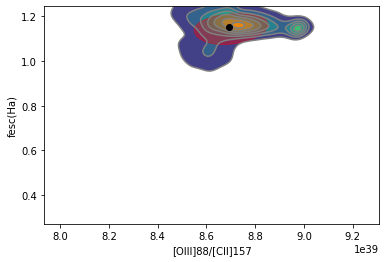

In [30]:
plot_2DPDF(
    t.posterior["O388.3323m"].data
    - t.posterior["C2157.636m"].data,
    t.posterior["cut_0"].data,
    xlabel="[OIII]88/[CII]157",
    ylabel="fesc(Ha)",
    filename=output_directory + "Plots/test.pdf",
    do_skunc=True,
    do_kde=True,
)

## Going further <a class="anchor" id="s9"></a>
***

- Check this [notebook](2_How_to_run_number_of_samples.ipynb) to assess the number of samples.
- Check this [notebook](4_How_to_run_advanced.ipynb) to explore other options for each step.
- Check this [notebook](5_How_to_run_datasets.ipynb) to use MULTIGRIS on several/many datasets.
- Check the [ISM application notebooks](ISM_applications.ipynb) for in-depth examples.